# Explorando as características financeiras do dataset

## Nessa atividade, você dará continidade na análise dos dados da planilha default_of_credit_card_clients__courseware_version_1_21_19.xls.

Agora você examinará as características financeiras ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'] presentes no dataset. Para visualizar melhor alguns desses dados, usaremos uma função matemática que deve ser familiar: o logaritmo. Você usará o pandas com apply, que serve para aplicar qualquer função a uma coluna ou DataFrame inteiro. Ao concluir a atividade, deverá ter o conjunto a seguir de histogramas de transformações logarítmicas de pagamentos diferentes de zero:


In [1]:
import pandas as pd
import openpyxl
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_excel('default_of_credit_card_clients__courseware_version_1_21_19.xls')
df = df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]
display(df)

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,3913,3102,689,0,0,0,0,689,0,0,0,0
1,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...
29995,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000
29996,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0
29997,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100
29998,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804


# Exercício 1 (2,0pts): Crie listas com nomes para as características financeiras restantes.

In [3]:

# Tabela Contas para todas as colunas com dívidas.
Contas = df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']]

# Tabela Pagamentos para todos os pagamentos das dívidas.
Pagamentos = df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]

display(Contas)
display(Pagamentos)

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
0,3913,3102,689,0,0,0
1,2682,1725,2682,3272,3455,3261
2,29239,14027,13559,14331,14948,15549
3,46990,48233,49291,28314,28959,29547
4,8617,5670,35835,20940,19146,19131
...,...,...,...,...,...,...
29995,188948,192815,208365,88004,31237,15980
29996,1683,1828,3502,8979,5190,0
29997,3565,3356,2758,20878,20582,19357
29998,-1645,78379,76304,52774,11855,48944


,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,0,689,0,0,0,0
1,0,1000,1000,1000,0,2000
2,1518,1500,1000,1000,1000,5000
3,2000,2019,1200,1100,1069,1000
4,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...
29995,8500,20000,5003,3047,5000,1000
29996,1837,3526,8998,129,0,0
29997,0,0,22000,4200,2000,3100
29998,85900,3409,1178,1926,52964,1804


# Exercício 2 (3,0pts): Use .describe() para examinar as sínteses estatísticas das características de valor da fatura. Reflita sobre o que viu. Faz sentido?

In [4]:
Contas.describe()

# Analisando a saída do describe é possível ver algumas informações interessantes
# 1º A discrepância de valor entre a média e o valor mais alto de contas
# 2º No mês 3 quase a base inteira teve gastos exorbitantes

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,50646.744233,48624.349167,4.649736e+04,42791.362167,39884.398167,38480.350933
std,73376.695080,70893.963498,6.910251e+04,64090.316188,60606.644833,59406.836932
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3234.000000,2682.000000,2.403000e+03,2034.000000,1534.000000,1080.000000
50%,21644.500000,20597.000000,1.975250e+04,18759.500000,17835.500000,16643.000000
75%,66148.500000,62999.750000,5.952675e+04,53572.250000,49804.000000,48863.500000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


# Exercício 3 (4,0pts): Visualize as características de valor da fatura usando uma grade 2 por 3 de plotagens de histograma. Dica: Você pode usar 20 bins para essa visualização.


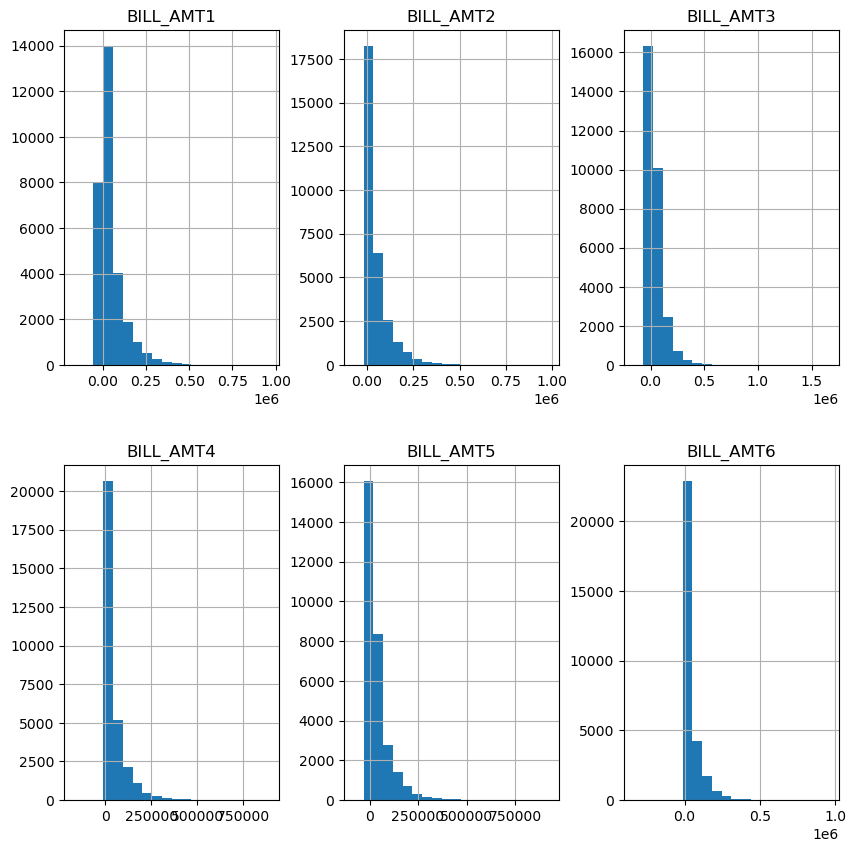

In [5]:
Contas.hist(figsize=(10, 10), layout=(2,3), bins = 20)
plt.show()

# Exercício 4 (4,0pts): Obtenha o resumo de .describe() para as características de valor do pagamento. Faz sentido?

In [6]:
Pagamentos.describe()
# Faz sentido, desta forma é possível ver que os pagamentos realmente são bem menores que o valor das contas.
# Mas, é possível identificar que mesmo com as contas no terceiro mês terem sido altas, os pagamentos do 2º mês foram altos em comparação ao valor das contas

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000
mean,5613.321500,5.855410e+03,5174.387967,4776.089733,4754.749200,5164.223267
std,16539.094312,2.299256e+04,17565.538305,15532.893047,15239.070708,17712.664703
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,836.000000,7.217500e+02,371.000000,223.000000,170.750000,9.000000
50%,2084.500000,2.000000e+03,1776.000000,1500.000000,1500.000000,1500.000000
75%,5000.000000,5.000000e+03,4500.000000,4000.000000,4000.000000,4000.000000
max,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000


# Exercício 5 (4,0pts): Plote um histograma das características de pagamento da fatura semelhante ao das características de valor da fatura, mas aplique também alguma rotação aos rótulos do eixo x com o argumento de palavra-chave xrot para que eles não se sobreponham. Podemos incluir o argumento de palavra-chave xrot=<ângulo> em qualquer função de plotagem para girar os rótulos do eixo x de acordo com um ângulo específico em graus. Considere os resultados.


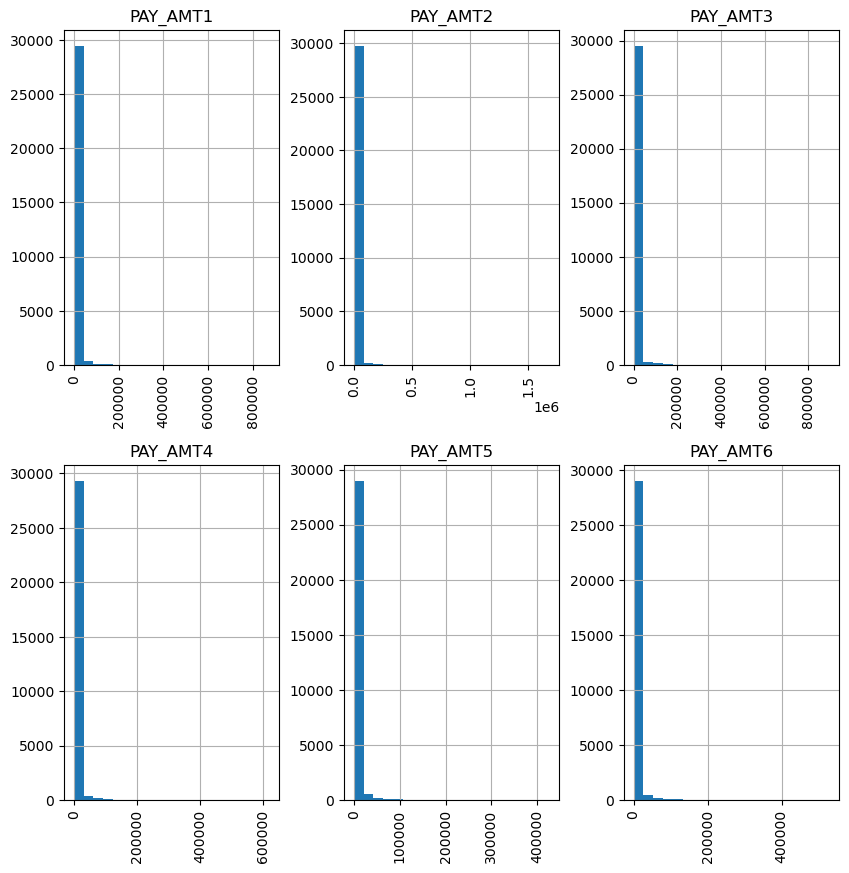

In [7]:
Pagamentos.hist(figsize=(10, 10), layout=(2,3), bins = 20, xrot=90)
plt.show()

# A visualização ainda está um pouco complicada, os valores estão diferentes de tabela para tabela e não é possível identificar um padrão correto devido a faixa de valores

# Exercício 6 (4,0pts): Use uma máscara booleana para ver quantos dos dados de valor do pagamento são exatamente iguais a 0. O resultado faz sentido dado o histograma da etapa anterior?

In [8]:
(Pagamentos == 0).sum()

# Desta forma é possível entender por que a faixa próximo a 0 está tão alta, a quantidade de valores iguais a 0 é muito grande, influenciando o histograma.

PAY_AMT1    5504
PAY_AMT2    5663
PAY_AMT3    6223
PAY_AMT4    6660
PAY_AMT5    6955
PAY_AMT6    7416
dtype: int64

# Exercício 7 (4,0pts): Ignorando os pagamentos iguais a 0 usando a máscara que criou na etapa anterior, utilize o método .apply() do pandas e o método np.log10() do NumPy para plotar histogramas de transformações logarítmicas dos pagamentos diferentes de zero. Considere os resultados. Dica: Você pode usar .apply() para aplicar qualquer função, inclusive log10, a todos os elementos de um DataFrame ou de uma coluna usando a sintaxe a seguir: .apply(<nome_função>).

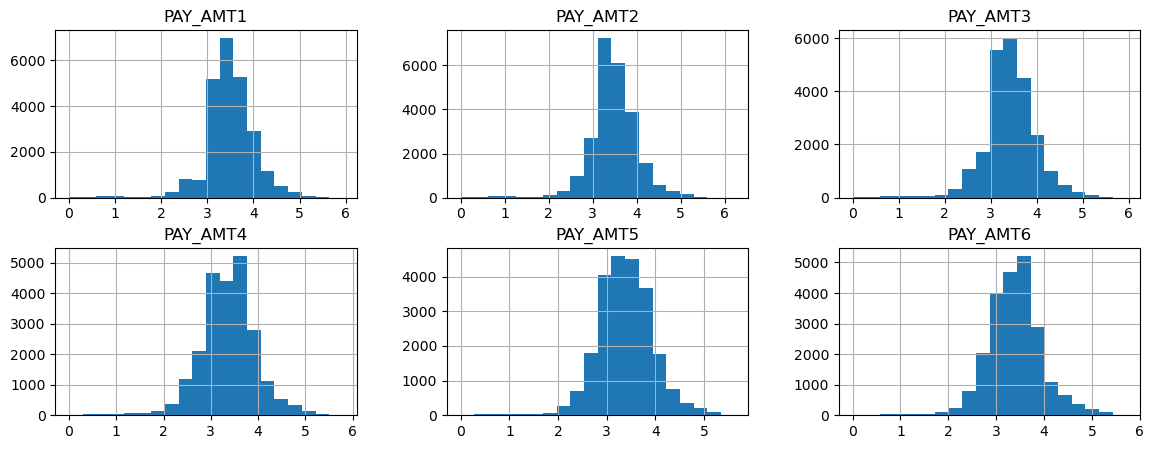

In [9]:
Pagamentos_log = Pagamentos[Pagamentos > 0].apply(np.log10)
Pagamentos_log.hist(figsize=(14,5), layout=(2,3), bins= 20)
plt.show()

# Desta forma o histograma fica visualmente melhor, é possível perceber que conforme os meses foram se passando, os pagamentos reduziram